In [4]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
folder_name = '/Users/andrei-macpro/Documents/Data/openpose/play/tracking/tracking/1206_play_1'

In [6]:
# do it for one folder first
# load each file in a pandas dataframe

tracks = []
for filename in sorted(os.listdir(folder_name)):
        # load the file in a pandas dataframe
    print(filename)
    filepath = os.path.join(folder_name, filename)
    df = pd.read_csv(filepath, index_col=0)
    tracks.append(df)


track1.csv
track2.csv


In [7]:
df1 = tracks[0] # check for missing values


In [8]:
df1

,x,y
frame,,
1.0,259.200000,302.400000
187.0,200.290909,216.000000
188.0,202.597839,216.000000
189.0,204.753303,215.546853
190.0,206.505327,216.508074
...,...,...
8712.0,180.000000,215.959203
8713.0,180.000000,215.953509
8714.0,180.000000,215.963649


In [9]:
# save df1 to csv
df1.to_csv('df1.csv')

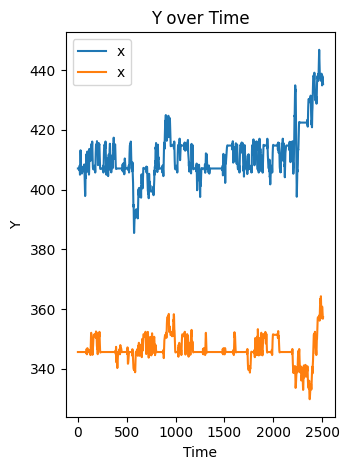

In [49]:
# plot a 2d graph of x and y

# cg


plt.subplot(1, 2, 1)
plt.plot(df1.index, df1['x'], label='x')
plt.xlabel('Time')
plt.ylabel('X')
plt.title('X over Time')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(df1.index, df1['y'], label='x')
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Y over Time')
plt.legend()

plt.tight_layout()
plt.show()

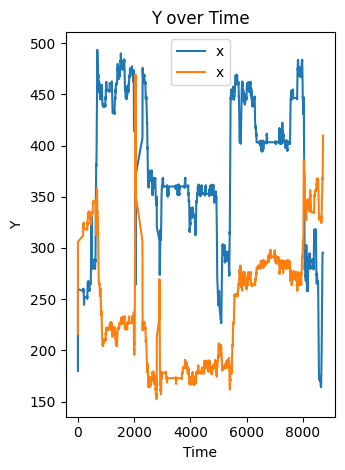

In [65]:
df2 = tracks[1]

# CG

plt.subplot(1, 2, 1)
plt.plot(df2.index, df2['x'], label='x')
plt.xlabel('Time')
plt.ylabel('X')
plt.title('X over Time')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(df2.index, df2['y'], label='x')
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Y over Time')
plt.legend()

plt.tight_layout()
plt.show()

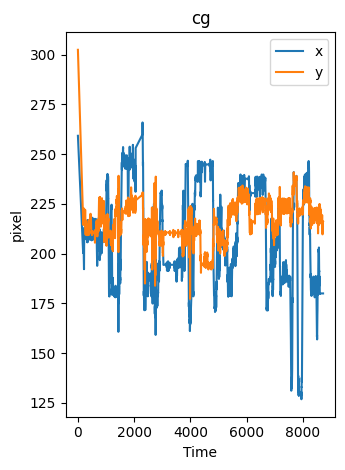

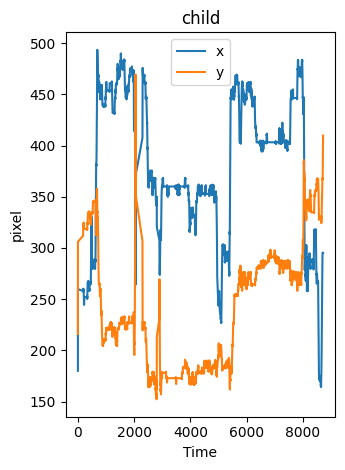

In [66]:
plt.subplot(1, 2, 1)
plt.plot(df1.index, df1['x'], label='x')
plt.xlabel('x')
plt.ylabel('X')
plt.title('X over Time')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(df1.index, df1['y'], label='y')
plt.xlabel('Time')
plt.ylabel('pixel')
plt.title('cg')
plt.legend()

plt.tight_layout()
plt.show()


plt.subplot(1, 2, 1)
plt.plot(df2.index, df2['x'], label='x')
plt.xlabel('x')
plt.ylabel('X')
plt.title('X over Time')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(df2.index, df2['y'], label='y')
plt.xlabel('Time')
plt.ylabel('pixel')
plt.title('child')
plt.legend()

plt.tight_layout()
plt.show()

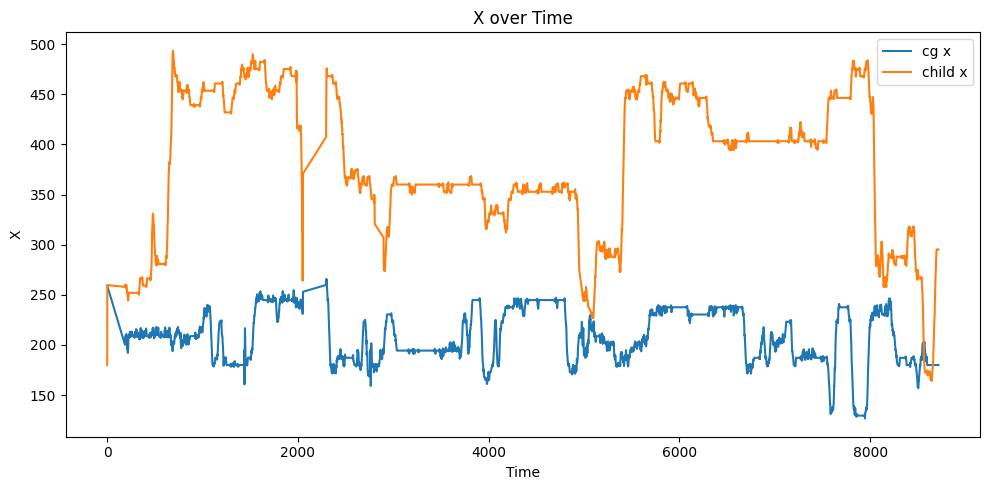

In [67]:
plt.figure(figsize=(10, 5))

# Plot 'x' from df1
plt.plot(df1.index, df1['x'], label='cg x')

# Plot 'x' from df2
plt.plot(df2.index, df2['x'], label='child x')

plt.xlabel('Time')
plt.ylabel('X')
plt.title('X over Time')
plt.legend()

plt.tight_layout()
plt.show()

[                 x           y
 frame                         
 1.0     161.280000  380.160000
 2.0     161.280000  380.160000
 3.0     161.280000  380.160000
 4.0     161.280000  380.160000
 5.0     161.280000  380.160000
 ...            ...         ...
 2504.0  245.751636  408.579233
 2505.0  245.780945  408.849927
 2506.0  245.795272  409.038189
 2507.0  245.784612  409.093177
 2508.0  245.738958  408.964049
 
 [2508 rows x 2 columns],
                  x           y
 frame                         
 1.0     407.040000  345.600000
 2.0     407.040000  345.600000
 3.0     407.040000  345.600000
 4.0     407.040000  345.600000
 5.0     407.040000  345.600000
 ...            ...         ...
 2504.0  437.156894  357.640199
 2505.0  436.546559  357.069772
 2506.0  435.956526  356.753644
 2507.0  435.500951  356.792068
 2508.0  435.293992  357.285299
 
 [2508 rows x 2 columns]]

In [68]:
df1['x_shifted'] = df1['x'].shift()
df1['y_shifted'] = df1['y'].shift()

df1['euclidean_diff'] = ((df1['x'] - df1['x_shifted'])**2 + (df1['y'] - df1['y_shifted'])**2)**0.5

# Drop the rows with NaN values
df1 = df1.dropna()

In [72]:
df1['x_shifted'] = df1['x'].shift()
df1['y_shifted'] = df1['y'].shift()

df1['euclidean_diff'] = ((df1['x'] - df1['x_shifted'])**2 + (df1['y'] - df1['y_shifted'])**2)**0.5


In [73]:
df1

,x,y,x_shifted,y_shifted,euclidean_diff
frame,,,,,
1.0,259.200000,302.400000,NaN,NaN,NaN
187.0,200.290909,216.000000,259.200000,302.400000,104.571703
188.0,202.597839,216.000000,200.290909,216.000000,2.306929
189.0,204.753303,215.546853,202.597839,216.000000,2.202582
190.0,206.505327,216.508074,204.753303,215.546853,1.998383
...,...,...,...,...,...
8712.0,180.000000,215.959203,180.000000,215.978206,0.019003
8713.0,180.000000,215.953509,180.000000,215.959203,0.005695
8714.0,180.000000,215.963649,180.000000,215.953509,0.010140


In [74]:
df1

,x,y,x_shifted,y_shifted,euclidean_diff
frame,,,,,
1.0,259.200000,302.400000,NaN,NaN,NaN
187.0,200.290909,216.000000,259.200000,302.400000,104.571703
188.0,202.597839,216.000000,200.290909,216.000000,2.306929
189.0,204.753303,215.546853,202.597839,216.000000,2.202582
190.0,206.505327,216.508074,204.753303,215.546853,1.998383
...,...,...,...,...,...
8712.0,180.000000,215.959203,180.000000,215.978206,0.019003
8713.0,180.000000,215.953509,180.000000,215.959203,0.005695
8714.0,180.000000,215.963649,180.000000,215.953509,0.010140


In [86]:
# Calculate z-scores for x and y columns
from scipy.stats import zscore
z_scores_x = zscore(df1['x'])
z_scores_y = zscore(df1['y'])

# Define threshold for z-score (e.g., 3)
threshold = 3

# Identify outliers based on z-scores
outliers_x = df1[abs(z_scores_x) > threshold]
outliers_y = df1[abs(z_scores_y) > threshold]

# Remove outliers from DataFrame
cleaned_df = df1[~df1.index.isin(outliers_x.index) & ~df1.index.isin(outliers_y.index)]

In [87]:
cleaned_df #### nooooice 

,x,y
frame,,
187.0,200.290909,216.000000
188.0,202.597839,216.000000
189.0,204.753303,215.546853
190.0,206.505327,216.508074
191.0,207.758366,216.671918
...,...,...
8712.0,180.000000,215.959203
8713.0,180.000000,215.953509
8714.0,180.000000,215.963649


In [3]:
import numpy as np

def calculate_velocity(pos1, pos2, time_diff):
    distance = np.linalg.norm(np.array(pos2) - np.array(pos1))
    velocity = distance / time_diff
    return velocity

def calculate_angle_change(vel1, vel2):
    dot_product = np.dot(vel1, vel2)
    magnitudes = np.linalg.norm(vel1) * np.linalg.norm(vel2)
    cos_angle = dot_product / magnitudes
    angle = np.arccos(cos_angle)
    return np.degrees(angle)

def calculate_rate_of_movement_changes(positions, timestamps, time_window):
    rate_of_changes = []
    
    for i in range(len(positions) - 1):
        pos1 = positions[i]
        pos2 = positions[i + 1]
        time_diff = (timestamps[i + 1] - timestamps[i]).total_seconds()
        
        velocity1 = calculate_velocity(pos1, pos2, time_diff)
        
        if i > 0:
            pos0 = positions[i - 1]
            velocity0 = calculate_velocity(pos0, pos1, time_diff)
            angle_change = calculate_angle_change(velocity0, velocity1)
            if angle_change > 45:  # Threshold for significant angle change
                rate_of_changes.append(angle_change)
    
    rate_per_window = len(rate_of_changes) / ((timestamps[-1] - timestamps[0]).total_seconds() / time_window)
    return rate_per_window

# Example usage
positions = [(1, 1), (2, 2), (3, 3), ...]  # List of (x, y) coordinates
timestamps = [1, 2, 3, ...]  # List of datetime timestamps
time_window = 60  # Time window in seconds

rate_of_changes = calculate_rate_of_movement_changes(positions, timestamps, time_window)
print("Rate of movement changes:", rate_of_changes)

AttributeError: 'int' object has no attribute 'total_seconds'